<a href="https://colab.research.google.com/github/shanikairoshi/Deep-Unfolded_QML/blob/main/DQSVC_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

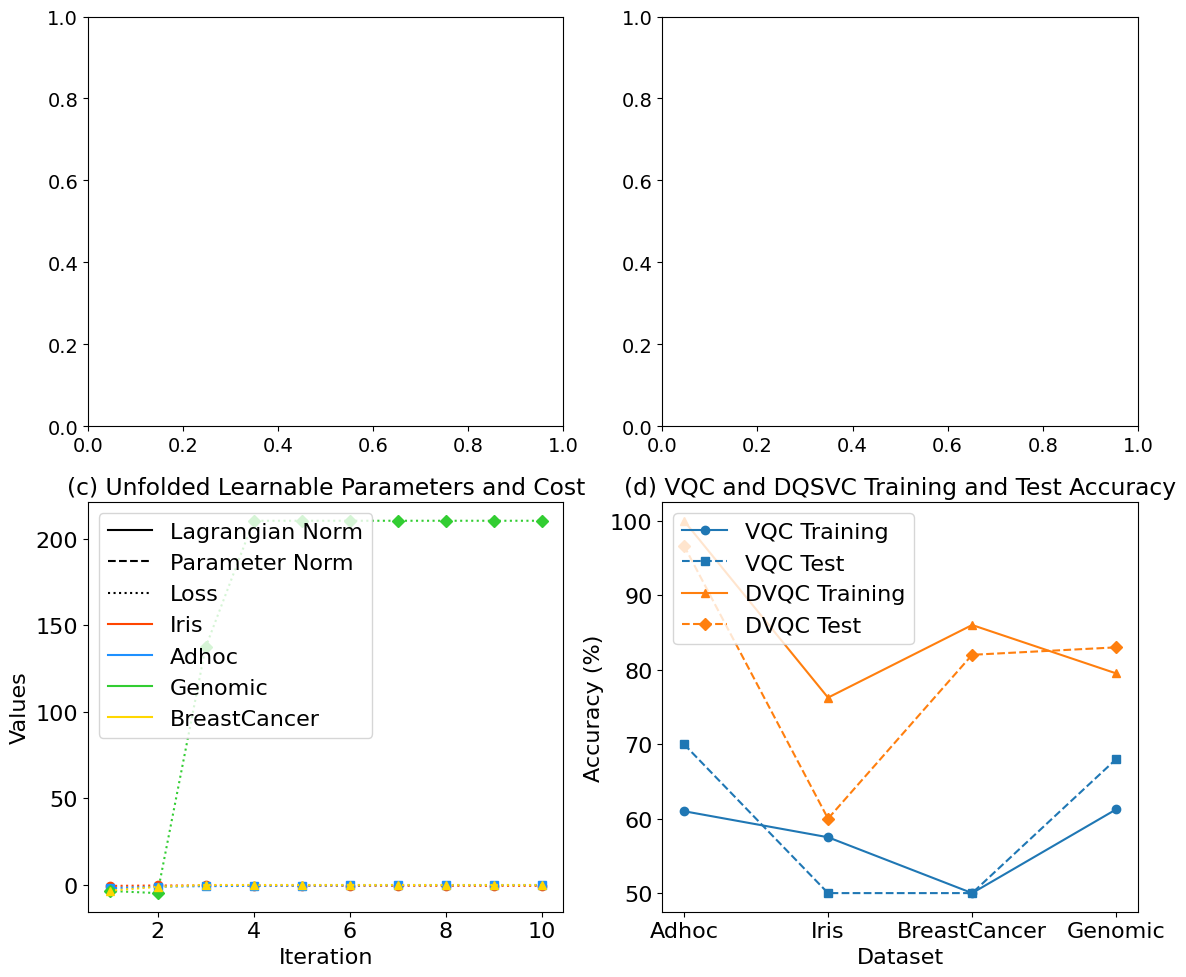

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

# Load the datasets
iris_df = pd.read_csv('/content/deep_unfolding_qsvc_results_IrisOriginal.csv')
adhoc_df = pd.read_csv('/content/deep_unfolding_qsvc_results_Adhoc.csv')
genomic_df = pd.read_csv('/content/deep_unfolding_qsvc_results_genomic.csv')
breastcancer_df = pd.read_csv('/content/deep_unfolding_qsvc_results_breastcancer.csv')

# Dictionary to hold the dataframes
datasets_dict = {
    "Iris": iris_df,
    "Adhoc": adhoc_df,
    "Genomic": genomic_df,
    "BreastCancer": breastcancer_df
}

# Define bright colors for each dataset
colors = {
    "Iris": "#FF4500",           # bright red-orange
    "Adhoc": "#1E90FF",          # bright blue
    "Genomic": "#32CD32",        # bright green
    "BreastCancer": "#FFD700"    # bright yellow
}

# Define markers for each dataset
markers = {
    "Iris": "o",                 # circle
    "Adhoc": "s",                # square
    "Genomic": "D",              # diamond
    "BreastCancer": "^"          # triangle up
}

# Create subplots for a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Increase the overall font size for axis tick labels
plt.rcParams.update({'font.size': 14})

# Proxy lines for the legend (VQC and DVQC distinction)
vqc_line = mlines.Line2D([], [], color='black', linestyle='--', label='QSVC')
dvqc_line = mlines.Line2D([], [], color='black', linestyle='-', label='DQSVC')
'''
# Plot 1: Training Accuracy (a)
for dataset_name, df in datasets_dict.items():
    axs[0, 0].plot(df['Iteration'], df['Training Accuracy'], label=f'{dataset_name}', color=colors[dataset_name], marker=markers[dataset_name], linestyle='-')
axs[0, 0].axhline(y=57.5, color=colors["Iris"], linestyle='--')  # VQC Iris
axs[0, 0].axhline(y=61, color=colors["Adhoc"], linestyle='--')  # VQC Adhoc
axs[0, 0].axhline(y=61.25, color=colors["Genomic"], linestyle='--')  # VQC Genomic
axs[0, 0].axhline(y=50, color=colors["BreastCancer"], linestyle='--')  # VQC BreastCancer
axs[0, 0].set_title('(a) DVQC Training Accuracy')
axs[0, 0].set_xlabel('Iteration', fontsize=16)
axs[0, 0].set_ylabel('Training Accuracy', fontsize=16)
axs[0, 0].legend(handles=[vqc_line, dvqc_line] + axs[0, 0].get_legend_handles_labels()[0], loc='upper left', fontsize=16)
axs[0, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 2: Test Accuracy (b)
for dataset_name, df in datasets_dict.items():
    axs[0, 1].plot(df['Iteration'], df['Test Accuracy'], label=f'{dataset_name}', color=colors[dataset_name], marker=markers[dataset_name], linestyle='-')
axs[0, 1].axhline(y=50, color=colors["Iris"], linestyle='--')  # VQC Iris
axs[0, 1].axhline(y=70, color=colors["Adhoc"], linestyle='--')  # VQC Adhoc
axs[0, 1].axhline(y=68, color=colors["Genomic"], linestyle='--')  # VQC Genomic
axs[0, 1].axhline(y=50, color=colors["BreastCancer"], linestyle='--')  # VQC BreastCancer
axs[0, 1].set_title('(b) DVQC Test Accuracy')
axs[0, 1].set_xlabel('Iteration', fontsize=16)
axs[0, 1].set_ylabel('Test Accuracy', fontsize=16)
axs[0, 1].legend(handles=[vqc_line, dvqc_line] + axs[0, 1].get_legend_handles_labels()[0], loc='upper left', fontsize=16)
axs[0, 1].tick_params(axis='both', which='major', labelsize=16)
'''
# Proxy lines for the legend to indicate LR, PR, and OFV distinction
lr_line = mlines.Line2D([], [], color='black', linestyle='-', label='Lagrangian Norm')
gr_line = mlines.Line2D([], [], color='black', linestyle='--', label='Gadient Norm')
pr_line = mlines.Line2D([], [], color='black', linestyle='--', label='Parameter Norm')
#ofv_line = mlines.Line2D([], [], color='black', linestyle=':', label='Loss')

# Plot 3: Learning Rate, Perturbation Rate, and Objective Function (c)
for dataset_name, df in datasets_dict.items():
    #axs[1, 0].plot(df['Iteration'], df['Alpha Update Norm'], color=colors[dataset_name], linestyle='-', marker=markers[dataset_name])
    #axs[1, 0].plot(df['Iteration'], df['Gradient Norm'], color=colors[dataset_name], linestyle='-', marker=markers[dataset_name])
    #axs[1, 0].plot(df['Iteration'], df['Phi Update Norm'], color=colors[dataset_name], linestyle='--', marker=markers[dataset_name])
    axs[1, 0].plot(df['Iteration'], df['Cost'], color=colors[dataset_name], linestyle=':', marker=markers[dataset_name])

axs[1, 0].set_title('(c) Unfolded Learnable Parameters and Cost')
axs[1, 0].set_xlabel('Iteration', fontsize=16)
axs[1, 0].set_ylabel('Values', fontsize=16)

# Add dataset entries to the legend
dataset_lines = [mlines.Line2D([], [], color=colors[name], label=name) for name in datasets_dict.keys()]

# Combine the proxy lines for LR, PR, and OFV with the dataset-specific entries
axs[1, 0].legend(handles=[lr_line, pr_line, ofv_line] + dataset_lines, loc='upper left', fontsize=16)

axs[1, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 4: Comparison of VQC and DVQC Accuracy (d)
datasets = ['Adhoc', 'Iris', 'BreastCancer', 'Genomic']
vqc_train_acc = [61, 57.5, 50, 61.25]
vqc_test_acc = [70, 50, 50, 68]
dvqc_train_acc = [100, 76.25, 86, 79.5]
dvqc_test_acc = [96.67, 60, 82, 83]

## Define colors for QNN and DQNN
colors_acc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for each dataset

# Plot for VQC and DVQC Accuracy
axs[1, 1].plot(datasets, vqc_train_acc, marker='o', linestyle='-', label='VQC Training', color=colors_acc[0])
axs[1, 1].plot(datasets, vqc_test_acc, marker='s', linestyle='--', label='VQC Test', color=colors_acc[0])
axs[1, 1].plot(datasets, dvqc_train_acc, marker='^', linestyle='-', label='DVQC Training', color=colors_acc[1])
axs[1, 1].plot(datasets, dvqc_test_acc, marker='D', linestyle='--', label='DVQC Test', color=colors_acc[1])
axs[1, 1].set_title('(d) VQC and DQSVC Training and Test Accuracy')
axs[1, 1].set_xlabel('Dataset', fontsize=16)
axs[1, 1].set_ylabel('Accuracy (%)', fontsize=16)
axs[1, 1].legend(loc='upper left', fontsize=16)
axs[1, 1].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('DQSVC_Combined_Figures_a_b_c_d_bright.png', dpi=800)

plt.show()


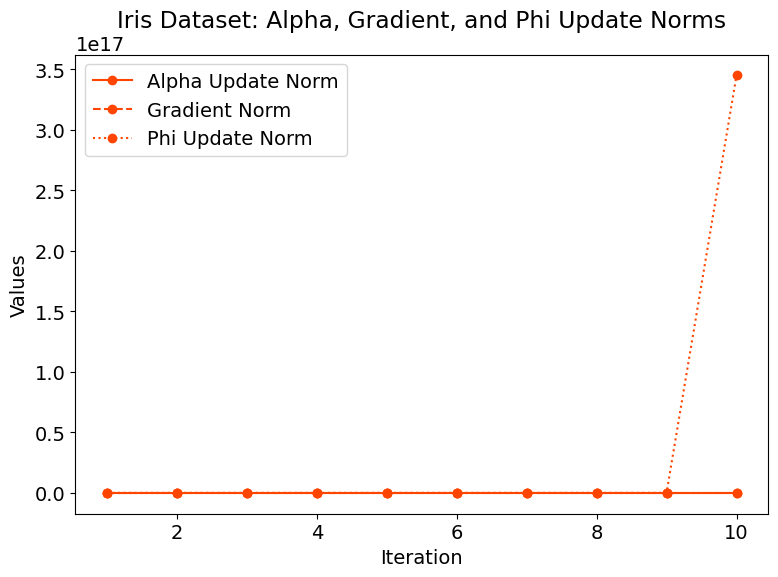

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris_df = pd.read_csv('/content/deep_unfolding_qsvc_results_IrisOriginal.csv')

# Define the color and marker for the Iris dataset
color = "#FF4500"  # bright red-orange
marker = "o"  # circle marker

# Create a new figure for the Iris data only
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Alpha Update Norm, Gradient Norm, and Phi Update Norm for the Iris dataset
ax.plot(iris_df['Iteration'], iris_df['Alpha Update Norm'], label='Alpha Update Norm', color=color, marker=marker, linestyle='-')
ax.plot(iris_df['Iteration'], iris_df['Gradient Norm'], label='Gradient Norm', color=color, marker=marker, linestyle='--')
ax.plot(iris_df['Iteration'], iris_df['Phi Update Norm'], label='Phi Update Norm', color=color, marker=marker, linestyle=':')

# Set titles and labels
ax.set_title('Iris Dataset: Alpha, Gradient, and Phi Update Norms')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


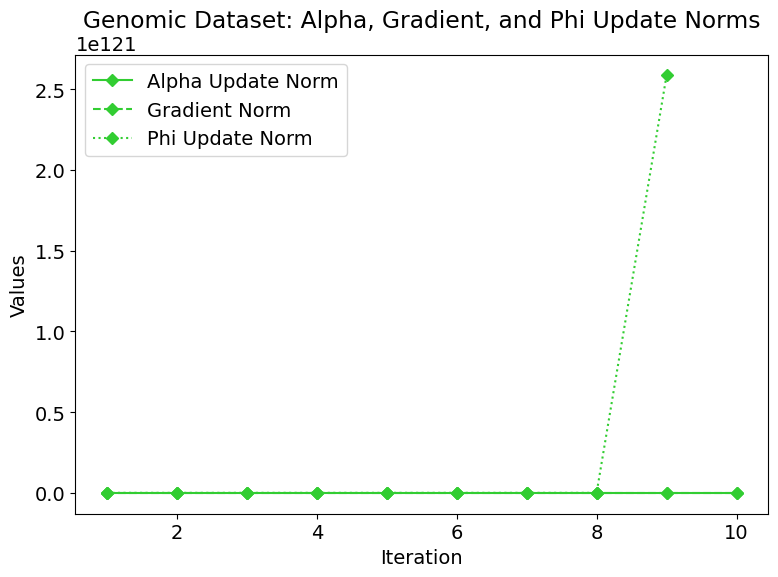

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Genomic dataset
genomic_df = pd.read_csv('/content/deep_unfolding_qsvc_results_genomic.csv')

# Define the color and marker for the Genomic dataset
color = "#32CD32"  # bright green
marker = "D"  # diamond marker

# Create a new figure for the Genomic data only
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Alpha Update Norm, Gradient Norm, and Phi Update Norm for the Genomic dataset
ax.plot(genomic_df['Iteration'], genomic_df['Alpha Update Norm'], label='Alpha Update Norm', color=color, marker=marker, linestyle='-')
ax.plot(genomic_df['Iteration'], genomic_df['Gradient Norm'], label='Gradient Norm', color=color, marker=marker, linestyle='--')
ax.plot(genomic_df['Iteration'], genomic_df['Phi Update Norm'], label='Phi Update Norm', color=color, marker=marker, linestyle=':')

# Set titles and labels
ax.set_title('Genomic Dataset: Alpha, Gradient, and Phi Update Norms')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


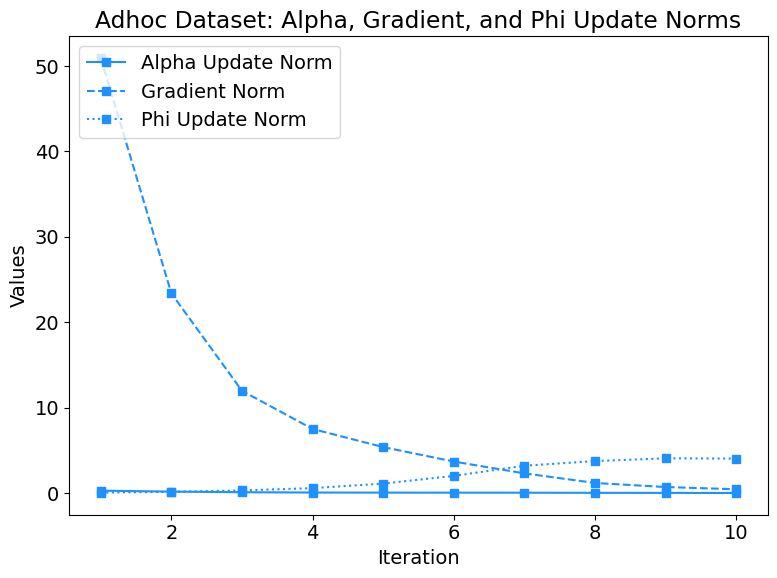

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Adhoc dataset
adhoc_df = pd.read_csv('/content/deep_unfolding_qsvc_results_Adhoc.csv')

# Define the color and marker for the Adhoc dataset
color = "#1E90FF"  # bright blue
marker = "s"  # square marker

# Create a new figure for the Adhoc data only
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Alpha Update Norm, Gradient Norm, and Phi Update Norm for the Adhoc dataset
ax.plot(adhoc_df['Iteration'], adhoc_df['Alpha Update Norm'], label='Alpha Update Norm', color=color, marker=marker, linestyle='-')
ax.plot(adhoc_df['Iteration'], adhoc_df['Gradient Norm'], label='Gradient Norm', color=color, marker=marker, linestyle='--')
ax.plot(adhoc_df['Iteration'], adhoc_df['Phi Update Norm'], label='Phi Update Norm', color=color, marker=marker, linestyle=':')

# Set titles and labels
ax.set_title('Adhoc Dataset: Alpha, Gradient, and Phi Update Norms')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


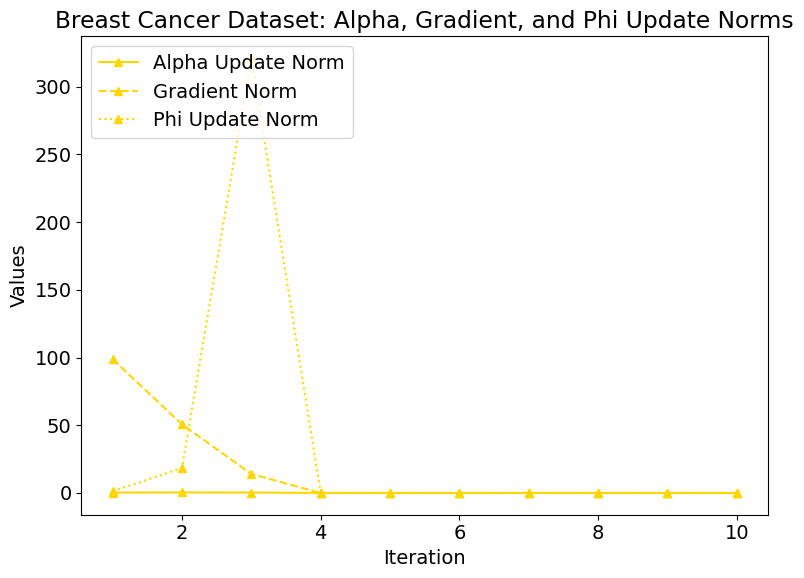

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Breast Cancer dataset
breastcancer_df = pd.read_csv('/content/deep_unfolding_qsvc_results_breastcancer.csv')

# Define the color and marker for the Breast Cancer dataset
color = "#FFD700"  # bright yellow
marker = "^"  # triangle up marker

# Create a new figure for the Breast Cancer data only
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Alpha Update Norm, Gradient Norm, and Phi Update Norm for the Breast Cancer dataset
ax.plot(breastcancer_df['Iteration'], breastcancer_df['Alpha Update Norm'], label='Alpha Update Norm', color=color, marker=marker, linestyle='-')
ax.plot(breastcancer_df['Iteration'], breastcancer_df['Gradient Norm'], label='Gradient Norm', color=color, marker=marker, linestyle='--')
ax.plot(breastcancer_df['Iteration'], breastcancer_df['Phi Update Norm'], label='Phi Update Norm', color=color, marker=marker, linestyle=':')

# Set titles and labels
ax.set_title('Breast Cancer Dataset: Alpha, Gradient, and Phi Update Norms')
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


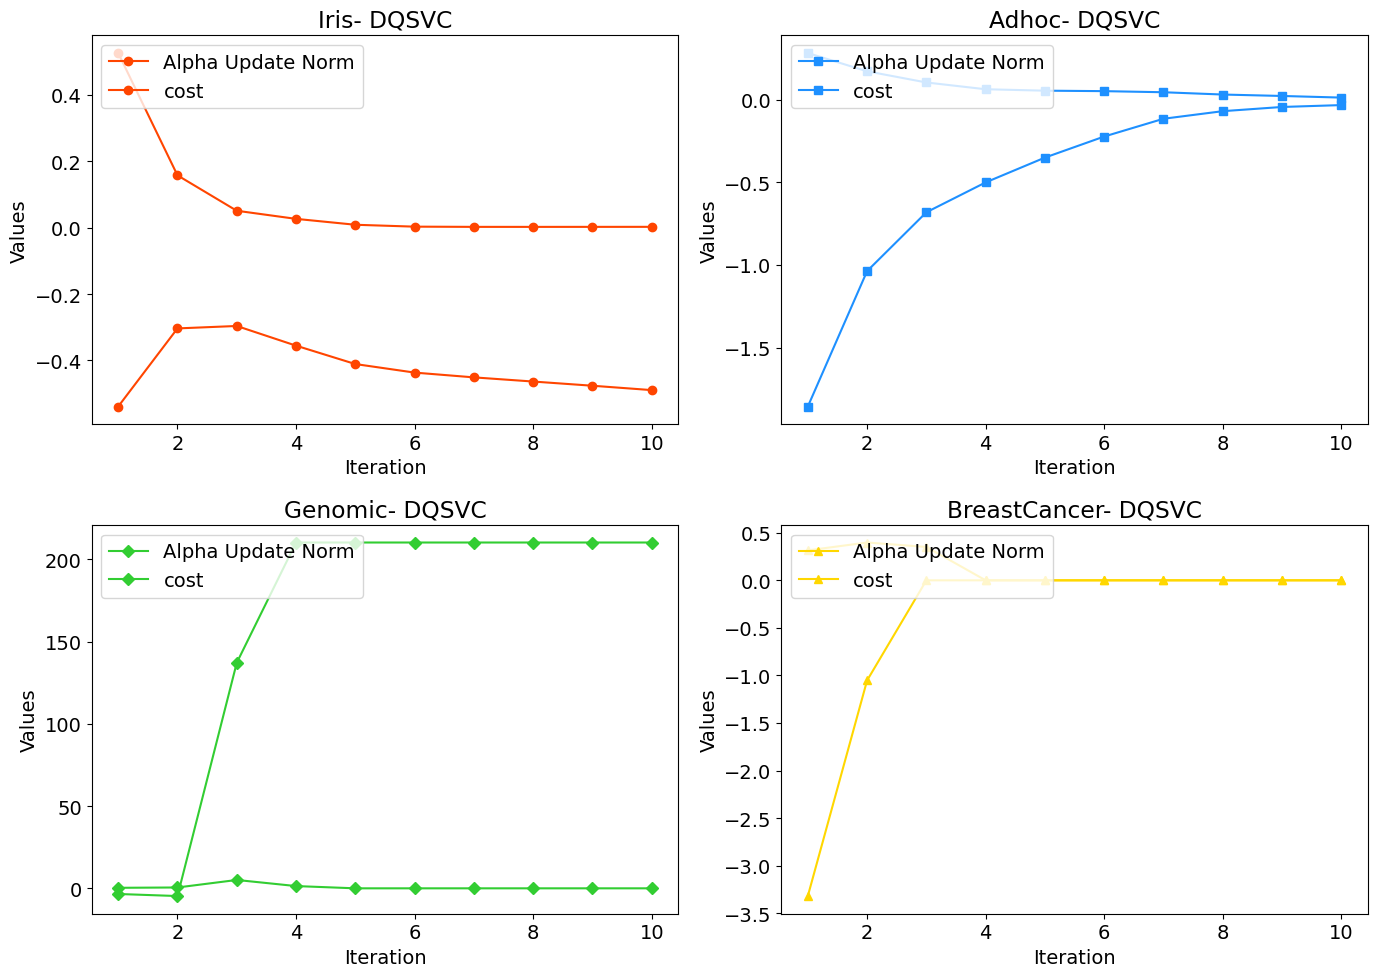

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
iris_df = pd.read_csv('/content/deep_unfolding_qsvc_results_IrisOriginal.csv')
adhoc_df = pd.read_csv('/content/deep_unfolding_qsvc_results_Adhoc.csv')
genomic_df = pd.read_csv('/content/deep_unfolding_qsvc_results_genomic.csv')
breastcancer_df = pd.read_csv('/content/deep_unfolding_qsvc_results_breastcancer.csv')

# Dictionary to hold the dataframes
datasets_dict = {
    "Iris": iris_df,
    "Adhoc": adhoc_df,
    "Genomic": genomic_df,
    "BreastCancer": breastcancer_df
}

# Define bright colors and markers for each dataset
colors = {
    "Iris": "#FF4500",           # bright red-orange
    "Adhoc": "#1E90FF",          # bright blue
    "Genomic": "#32CD32",        # bright green
    "BreastCancer": "#FFD700"    # bright yellow
}

markers = {
    "Iris": "o",                 # circle
    "Adhoc": "s",                # square
    "Genomic": "D",              # diamond
    "BreastCancer": "^"          # triangle up
}

# Create subplots for each dataset (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Increase the overall font size for axis tick labels
plt.rcParams.update({'font.size': 14})

# Plot Alpha Update Norm, Gradient Norm, and Phi Update Norm for each dataset in subplots
for i, (dataset_name, df) in enumerate(datasets_dict.items()):
    row = i // 2
    col = i % 2
    axs[row, col].plot(df['Iteration'], df['Alpha Update Norm'], label='Alpha Update Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle='-')
    #axs[row, col].plot(df['Iteration'], abs(df['Cost']), label='cost', color=colors[dataset_name], marker=markers[dataset_name], linestyle=':')
    axs[row, col].plot(df['Iteration'], df['Cost'], label='cost', color=colors[dataset_name], marker=markers[dataset_name], linestyle='-')
    #axs[row, col].plot(df['Iteration'], df['Gradient Norm'], label='Gradient Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle='--')
    #axs[row, col].plot(df['Iteration'], df['Phi Update Norm'], label='Phi Update Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle=':')
    axs[row, col].set_title(f'{dataset_name}- DQSVC')
    axs[row, col].set_xlabel('Iteration')
    axs[row, col].set_ylabel('Values')
    axs[row, col].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
# Save the figure as an image (PNG format, but you can use other formats like JPG or PDF)
plt.savefig('deep_unfolding_metrics_plotDQSVC.png', dpi=800)

# Show the plot
plt.show()


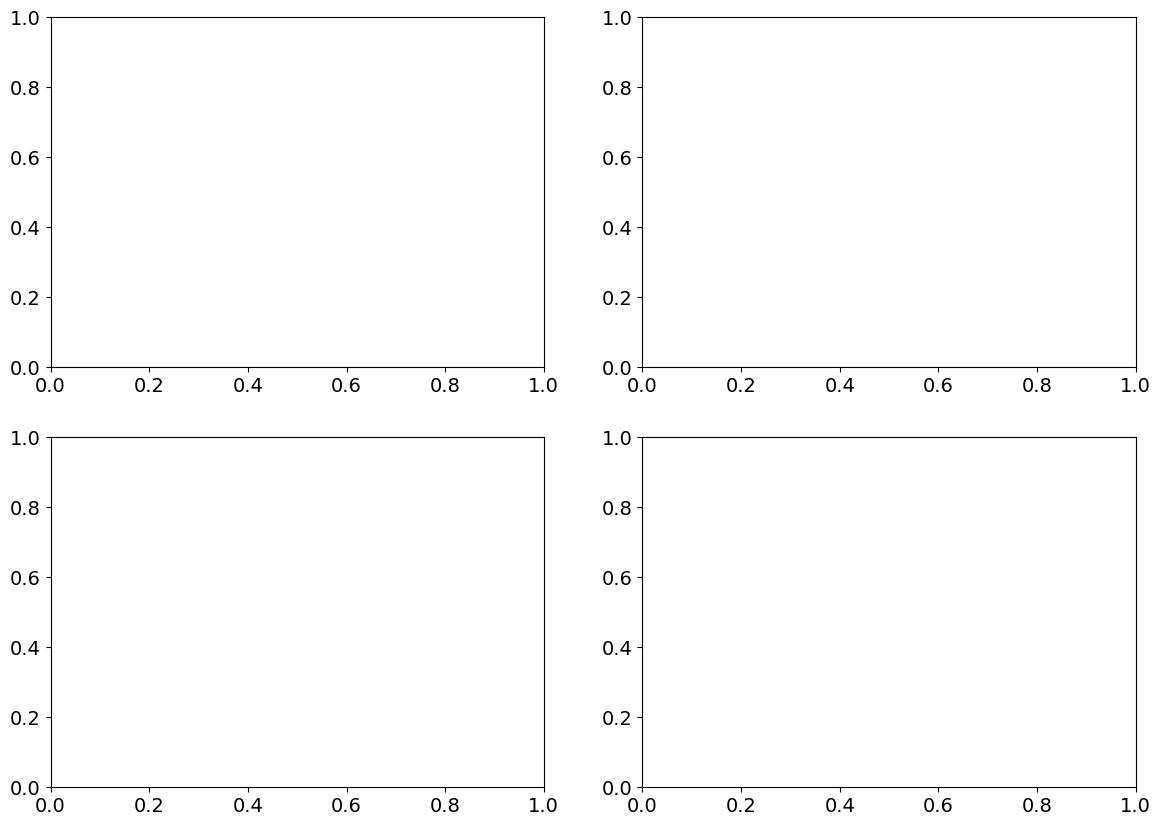

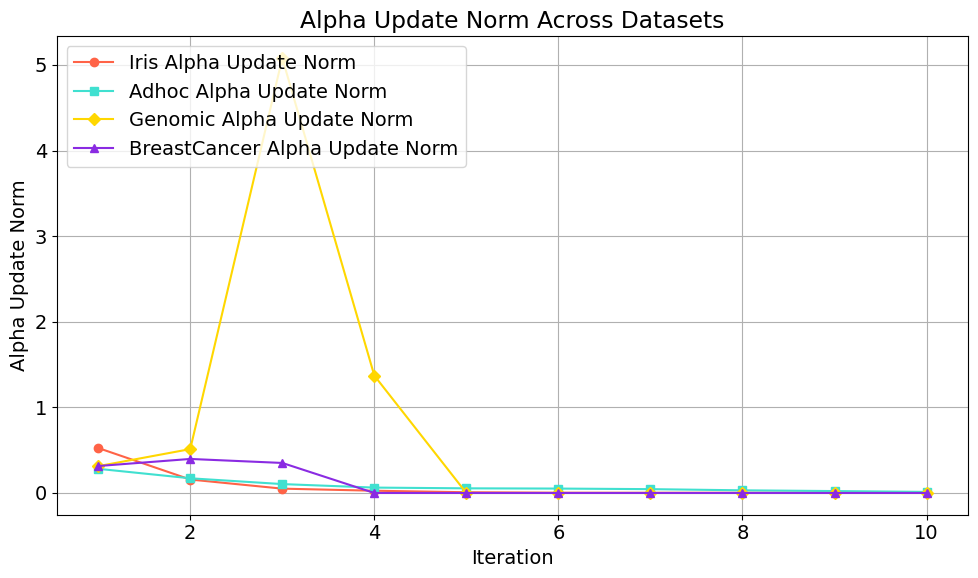

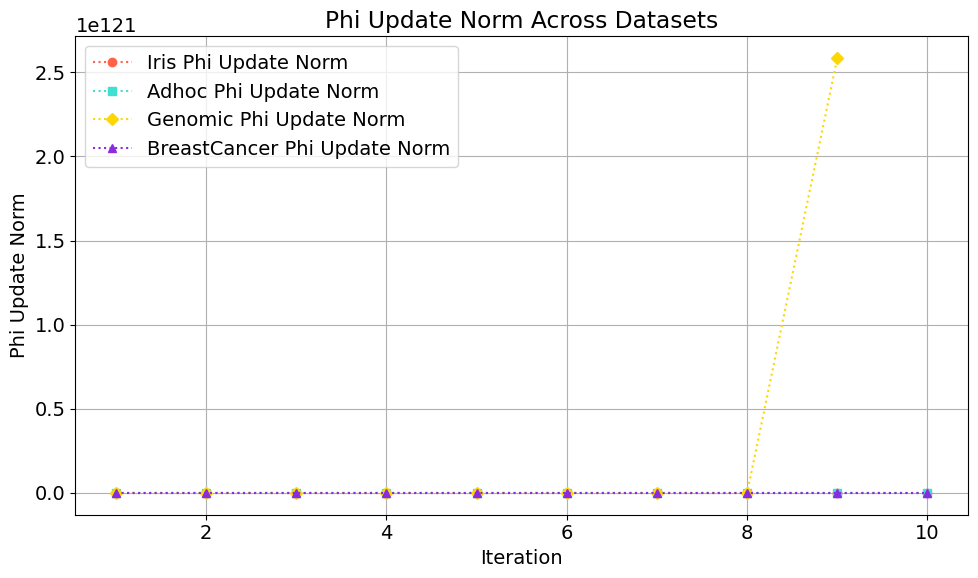

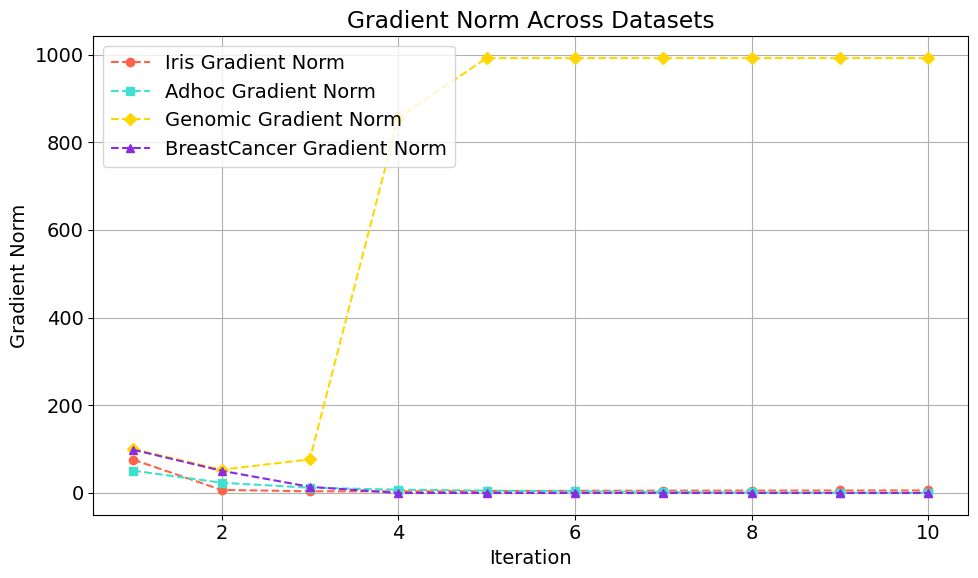

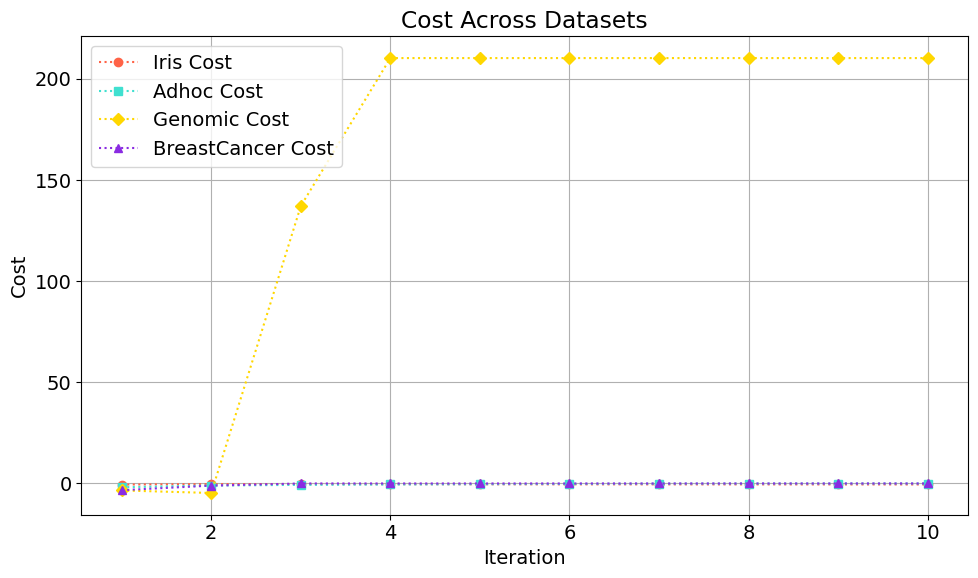

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
iris_df = pd.read_csv('/content/deep_unfolding_qsvc_results_IrisOriginal.csv')
adhoc_df = pd.read_csv('/content/deep_unfolding_qsvc_results_Adhoc.csv')
genomic_df = pd.read_csv('/content/deep_unfolding_qsvc_results_genomic.csv')
breastcancer_df = pd.read_csv('/content/deep_unfolding_qsvc_results_breastcancer.csv')

# Dictionary to hold the dataframes
datasets_dict = {
    "Iris": iris_df,
    "Adhoc": adhoc_df,
    "Genomic": genomic_df,
    "BreastCancer": breastcancer_df
}

colors = {
    "Iris": "#FF6347",           # Tomato Red
    "Adhoc": "#40E0D0",          # Turquoise
    "Genomic": "#FFD700",        # Gold
    "BreastCancer": "#8A2BE2"    # Blue Violet
}


markers = {
    "Iris": "o",                 # circle
    "Adhoc": "s",                # square
    "Genomic": "D",              # diamond
    "BreastCancer": "^"          # triangle up
}

# Create a figure for each type of plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Increase the overall font size for axis tick labels
plt.rcParams.update({'font.size': 14})

# Plot 1: Alpha Update Norm for all datasets in one plot
plt.figure(figsize=(10, 6))
for dataset_name, df in datasets_dict.items():
    plt.plot(df['Iteration'], df['Alpha Update Norm'], label=f'{dataset_name} Alpha Update Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle='-')
plt.title('Alpha Update Norm Across Datasets')
plt.xlabel('Iteration')
plt.ylabel('Alpha Update Norm')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Phi Update Norm for all datasets in one plot
plt.figure(figsize=(10, 6))
for dataset_name, df in datasets_dict.items():
    plt.plot(df['Iteration'], df['Phi Update Norm'], label=f'{dataset_name} Phi Update Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle=':')
plt.title('Phi Update Norm Across Datasets')
plt.xlabel('Iteration')
plt.ylabel('Phi Update Norm')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Gradient Norm for all datasets in one plot
plt.figure(figsize=(10, 6))
for dataset_name, df in datasets_dict.items():
    plt.plot(df['Iteration'], df['Gradient Norm'], label=f'{dataset_name} Gradient Norm', color=colors[dataset_name], marker=markers[dataset_name], linestyle='--')
plt.title('Gradient Norm Across Datasets')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Cost for all datasets in one plot
plt.figure(figsize=(10, 6))
for dataset_name, df in datasets_dict.items():
    plt.plot(df['Iteration'], df['Cost'], label=f'{dataset_name} Cost', color=colors[dataset_name], marker=markers[dataset_name], linestyle=':')
plt.title('Cost Across Datasets')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


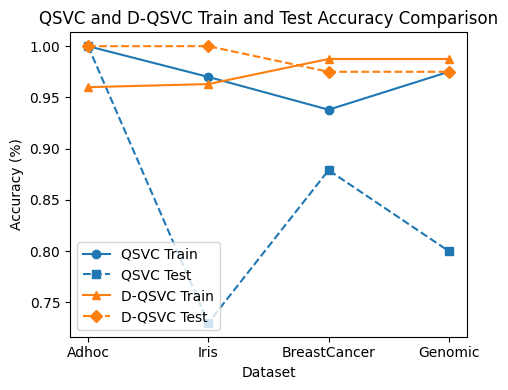

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/TrainingAccuracyComparison_QSVC.csv')

# Extract the columns for plotting
datasets = df['Dataset']
qsvc_train_acc = df['QSVC_Train']
qsvc_test_acc = df['QSVC_Test']
dqsvc_train_acc = df['D_QSVC_Train']
dqsvc_test_acc = df['D_QSVC_Test']

# Define colors for QSVC and D-QSVC
colors_acc = ['#1f77b4', '#ff7f0e']

# Create a new figure for the plot
plt.figure(figsize=(5, 4))

# Plot for QSVC and D-QSVC Train Accuracy
plt.plot(datasets, qsvc_train_acc, marker='o', linestyle='-', label='QSVC Train', color=colors_acc[0])
plt.plot(datasets, qsvc_test_acc, marker='s', linestyle='--', label='QSVC Test', color=colors_acc[0])
plt.plot(datasets, dqsvc_train_acc, marker='^', linestyle='-', label='D-QSVC Train', color=colors_acc[1])
plt.plot(datasets, dqsvc_test_acc, marker='D', linestyle='--', label='D-QSVC Test', color=colors_acc[1])

# Add title and labels
plt.title('QSVC and D-QSVC Train and Test Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')

# Add a legend
plt.legend(loc='lower left')

# Display the plot
plt.tight_layout()
plt.show()
